In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
# Define paths to video and model
VIDEO_PATH = "/content/drive/MyDrive/PlayerReIDProject/videos/15sec_input_720p.mp4"
MODEL_PATH = "/content/drive/MyDrive/PlayerReIDProject/models/best.pt"


In [4]:
from ultralytics import YOLO

# Load the fine-tuned detection model
model = YOLO(MODEL_PATH)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import cv2
import matplotlib.pyplot as plt


In [6]:
# Load video
cap = cv2.VideoCapture(VIDEO_PATH)

# Read the 50th frame
frame_index = 50
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()

if not ret:
    print("Failed to read frame")
else:
    print(f"Frame {frame_index} loaded successfully")

cap.release()


Frame 50 loaded successfully



0: 384x640 17 players, 2 referees, 101.1ms
Speed: 12.8ms preprocess, 101.1ms inference, 354.7ms postprocess per image at shape (1, 3, 384, 640)


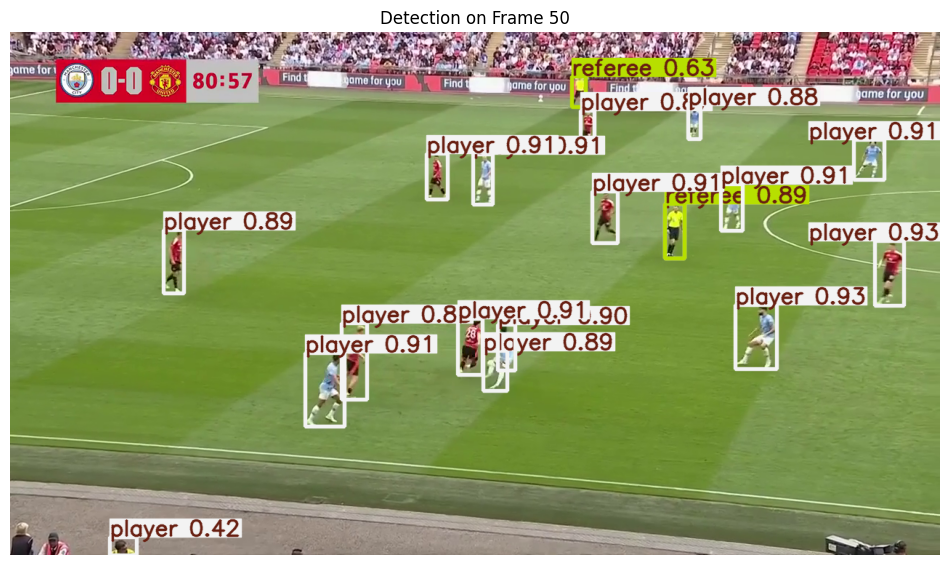

In [7]:
# Convert BGR to RGB for correct color rendering
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Run detection
results = model(frame_rgb)

# Draw boxes on frame
annotated_frame = results[0].plot()

# Show the frame
plt.figure(figsize=(12, 8))
plt.imshow(annotated_frame)
plt.axis('off')
plt.title(f"Detection on Frame {frame_index}")
plt.show()


In [8]:
import cv2
import csv

# Set up video reader
cap = cv2.VideoCapture(VIDEO_PATH)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Video info: {frame_count} frames, {fps:.2f} FPS, {width}x{height}")

# Number of frames to process
MAX_FRAMES = 300

# Store detection results
detections_per_frame = []


with open("detections.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["frame_number", "class_id", "confidence", "x1", "y1", "x2", "y2"])

    for i in range(MAX_FRAMES):
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = model(frame_rgb)

        frame_detections = []
        for det in results[0].boxes:
            x1, y1, x2, y2 = det.xyxy[0].tolist()
            conf = det.conf[0].item()
            cls_id = int(det.cls[0].item())
            frame_detections.append({
                "bbox": [x1, y1, x2, y2],
                "conf": conf,
                "class_id": cls_id
            })

            ## writing to csv
            writer.writerow([i, cls_id, conf, x1, y1, x2, y2])

        detections_per_frame.append(frame_detections)

        if i % 10 == 0:
            print(f"Processed frame {i}")

cap.release()


Video info: 375 frames, 25.00 FPS, 1280x720

0: 384x640 16 players, 2 referees, 67.5ms
Speed: 3.7ms preprocess, 67.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 0

0: 384x640 16 players, 1 referee, 67.4ms
Speed: 2.6ms preprocess, 67.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 66.5ms
Speed: 2.6ms preprocess, 66.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 42.8ms
Speed: 2.4ms preprocess, 42.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 41.6ms
Speed: 3.7ms preprocess, 41.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 41.1ms
Speed: 2.2ms preprocess, 41.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 35.5ms
Speed: 2.4ms preprocess, 35.5ms inference, 1.8ms postproce

In [9]:
cap = cv2.VideoCapture(VIDEO_PATH)
out = cv2.VideoWriter("annotated_output.avi", cv2.VideoWriter_fourcc(*"XVID"), fps, (width, height))

for i in range(min(MAX_FRAMES, len(detections_per_frame))):
    ret, frame = cap.read()
    if not ret:
        break

    for det in detections_per_frame[i]:
        x1, y1, x2, y2 = map(int, det["bbox"])
        cls_id = det["class_id"]
        conf = det["conf"]

        label = f"{model.names[cls_id]}: {conf:.2f}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    out.write(frame)

cap.release()
out.release()
print("Annotated video saved as 'annotated_output.avi'")


Annotated video saved as 'annotated_output.avi'


In [12]:
import pandas as pd

df = pd.read_csv("detections.csv")
df.head()

,frame_number,class_id,confidence,x1,y1,x2,y2
0,0,2,0.922195,840.620972,188.445618,872.595215,247.689819
1,0,2,0.919986,794.998901,470.846375,863.228027,564.776917
2,0,2,0.916773,432.426270,160.126068,467.726929,228.373535
3,0,2,0.916589,887.840088,124.185333,913.689697,176.924042
4,0,2,0.912014,144.540375,266.094025,189.735809,348.067047


In [13]:
!pip install deep_sort_realtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 76.3 MB/s eta 0:00:00


In [14]:
from deep_sort_realtime.deepsort_tracker import DeepSort

tracker = DeepSort(max_age=30)


In [41]:
from deep_sort_realtime.deepsort_tracker import DeepSort
import cv2

# Initialize video and tracker
cap = cv2.VideoCapture(VIDEO_PATH)
tracker = DeepSort(max_age=30)

tracked_detections = []

for frame_num in range(MAX_FRAMES):
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(frame_rgb)
    results[0].boxes

    detections = []
    for det in results[0].boxes:
      x1, y1, x2, y2 = det.xyxy[0].tolist()
      conf = det.conf[0].item()
      class_id = int(det.cls[0].item())
      label = model.names[class_id]

      if label == "player" and conf > 0.7:  # Only track players
        detections.append(([x1, y1, x2 - x1, y2 - y1], conf, 'player'))


    tracks = tracker.update_tracks(detections, frame=frame)

    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        ltrb = track.to_ltrb()
        x, y, x2, y2 = map(int, ltrb)
        w, h = x2 - x, y2 - y

        if w < 10 or h < 10 or w > width or h > height:
            continue

        tracked_detections.append([frame_num, track_id, x, y, w, h])

cap.release()



0: 384x640 16 players, 2 referees, 67.5ms
Speed: 3.7ms preprocess, 67.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 67.5ms
Speed: 2.3ms preprocess, 67.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 67.4ms
Speed: 2.0ms preprocess, 67.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 42.7ms
Speed: 2.7ms preprocess, 42.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 36.4ms
Speed: 6.0ms preprocess, 36.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 38.4ms
Speed: 2.5ms preprocess, 38.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 37.3ms
Speed: 2.3ms preprocess, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players,

In [42]:
import pandas as pd

df = pd.DataFrame(tracked_detections, columns=["frame", "id", "x", "y", "w", "h"])
df.to_csv("tracked_detections.csv", index=False)
df.head()


,frame,id,x,y,w,h
0,2,1,859,188,32,60
1,2,2,813,465,66,91
2,2,3,455,160,35,67
3,2,4,908,125,25,52
4,2,5,164,265,46,82


In [43]:
import pandas as pd
import cv2

# Load tracked data
df = pd.read_csv("tracked_detections.csv")

# Reopen video
cap = cv2.VideoCapture(VIDEO_PATH)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Output video writer
out = cv2.VideoWriter('tracked_output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

frame_number = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Get all rows for current frame
    rows = df[df['frame'] == frame_number]

    for _, row in rows.iterrows():
        x, y, w, h, person_id = int(row['x']), int(row['y']), int(row['w']), int(row['h']), int(row['id'])
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, f"ID {person_id}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    out.write(frame)
    frame_number += 1

cap.release()
out.release()
print("✅ Tracked video saved as 'tracked_output.avi'")


✅ Tracked video saved as 'tracked_output.avi'
